## Import Libraries

In [13]:
import pandas as pd
import json
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

## Load Data

## Compute Distribution Answer Types

First open the txt file containing the query texts and corresponding answer types.

In [14]:
experiment_answer_types = {}
counter_answer_types = 0
counter_no_answer_types = 0
with open("experiment_answer_types.txt", "r") as infile:
    for line in infile:
        if("\t" in line.rstrip()):
            counter_answer_types += 1
            [query_text,answer_type] = line.rstrip().split("\t")
            experiment_answer_types[query_text] = answer_type.split(":")[0]
        else:
            if not line.rstrip() == "":
                counter_no_answer_types += 1
                experiment_answer_types[line.rstrip()] = ""

In [15]:
print("There are %s queries for which no answer type could be classified."%(counter_no_answer_types))

There are 20 queries for which no answer type could be classified.


Because 20 queries do not yet have a corresponding answer type, we open the txt file which contains the answer types we manually decided on.

In [16]:
with open("manual_answer_types.txt", "r", encoding='utf-8') as infile:
    for line in infile:
        [query_text,answer_type] = line.rstrip().split("\t")
        if query_text in experiment_answer_types.keys():
            experiment_answer_types[query_text] = answer_type

Now lets check if there are still queries for which no answer type is available

In [17]:
for query_text, answer_type in experiment_answer_types.items():
    if answer_type == "":
        print(query_text)

Next we count the number of queries per answer type.

In [18]:
answer_types = list(experiment_answer_types.values())
answer_types_counts = Counter(answer_types)
answer_type_count_tuples = sorted(answer_types_counts.items(), key=lambda item: item[1],reverse=True)
answer_types_sorted_on_count = [k for k, v in answer_type_count_tuples]
answer_type_counts_sorted_on_count = [v for k, v in answer_type_count_tuples]

And we visualize this with a Bar plot

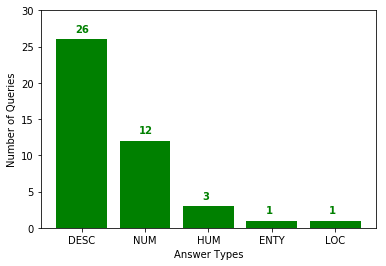

In [19]:
fig, ax = plt.subplots() 
ax.bar(answer_types_sorted_on_count, answer_type_counts_sorted_on_count, color='g')
for i, v in enumerate(answer_type_counts_sorted_on_count):
    ax.text(i - 0.1, v + 1 , str(v), color='g', fontweight='bold')
ax.set_ylim([0,30])
plt.xlabel("Answer Types")
plt.ylabel("Number of Queries")
plt.savefig('images/experiment_queries_answer_type_distribution.png', bbox_inches='tight')
plt.show()